<a href="https://colab.research.google.com/github/hayu2004/DATA2/blob/main/RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

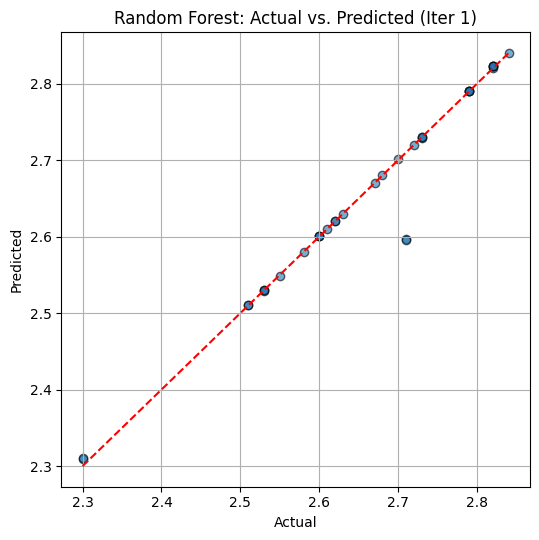

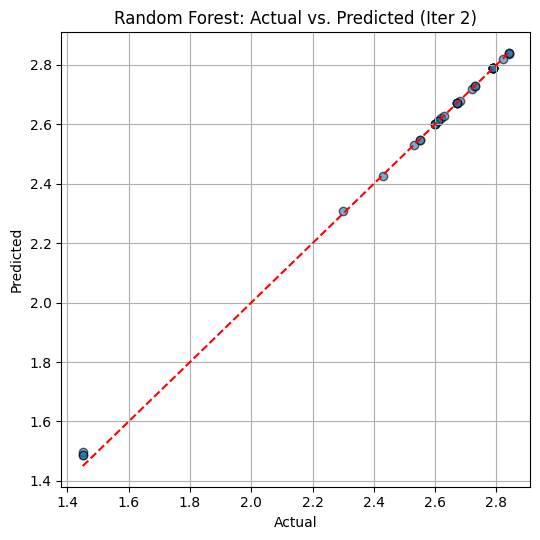

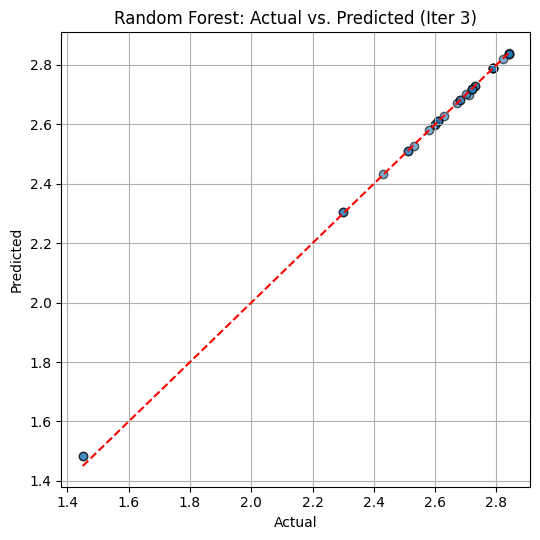

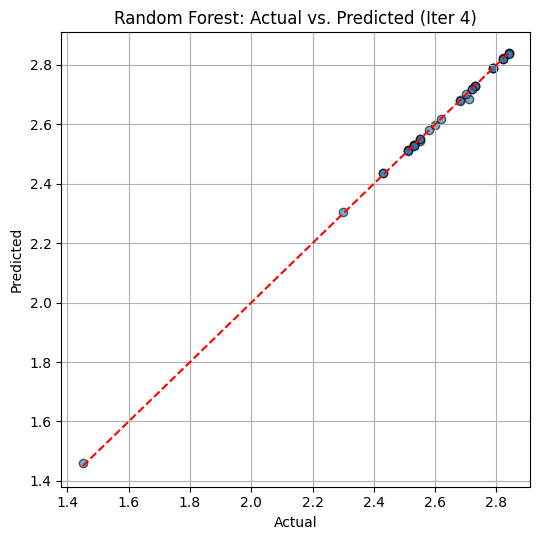

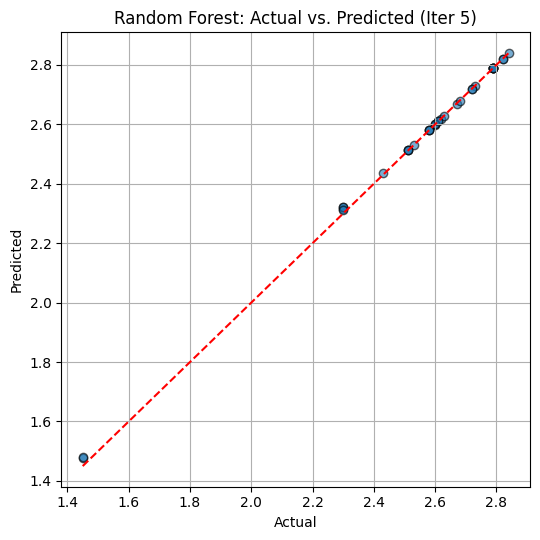

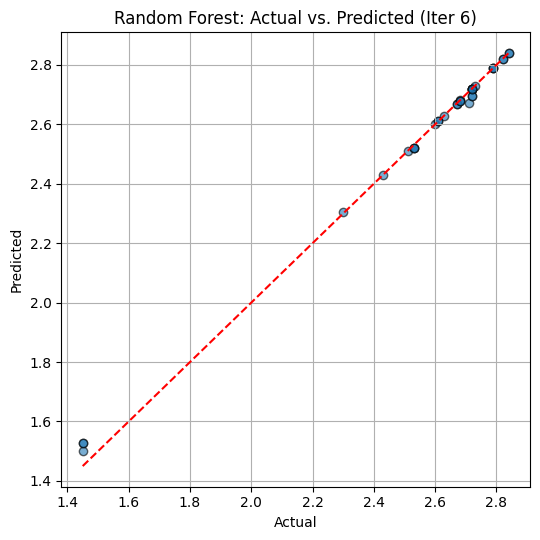

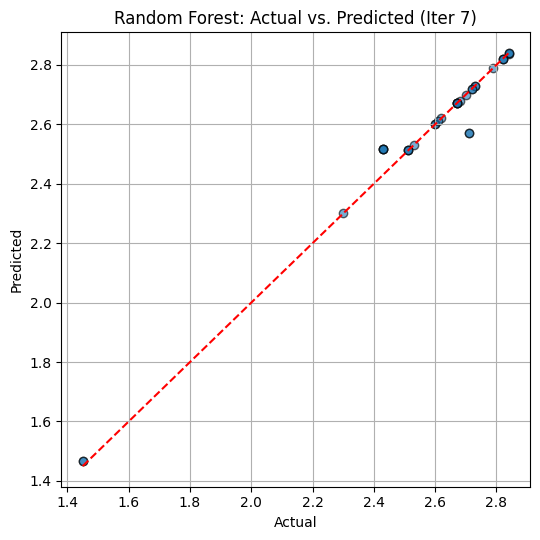

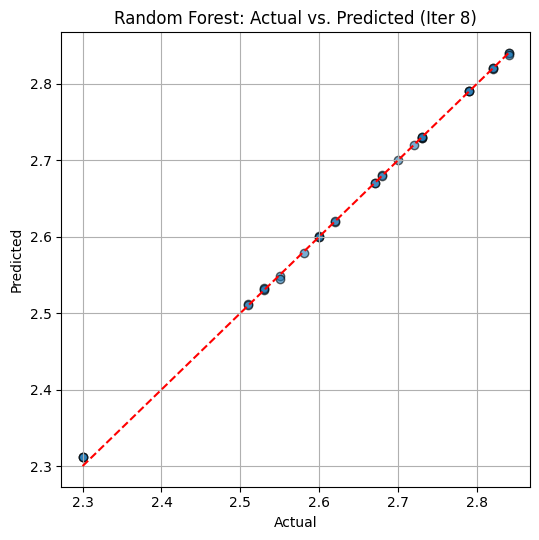

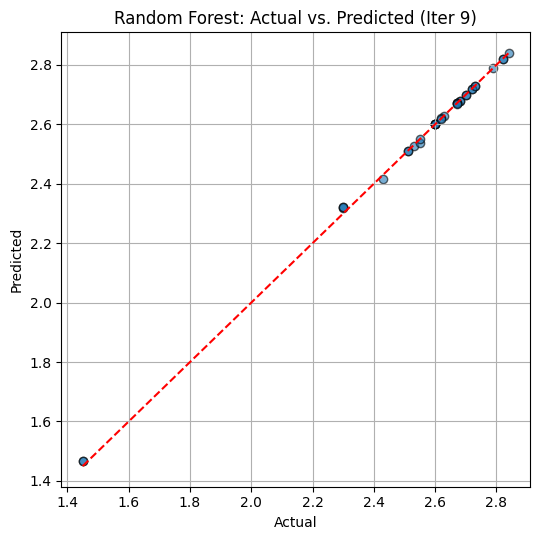

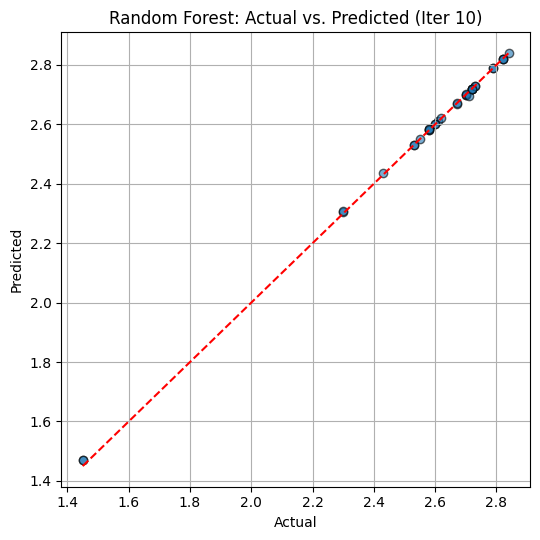


 Average Metrics over 10 runs (Random Forest):
MAE  : 0.0059 ± 0.0051
RMSE : 0.0147 ± 0.0123
R²   : 0.9930 ± 0.0126


In [3]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Dataset2.csv')

X = df[["c_d", "ce_cs", "ce_sg", "f_q", "f_sg", "c_q", "c_sg", "w", "w/c", "p_q", "p_ts", "p_sg", "slump"]].values
y = df[["c_sg"]].values.ravel()  # Chuyển về vector 1 chiều cho RF
mae_list, rmse_list, r2_list = [], [], []

for seed in range(10):
    #  Chia tập train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    #  Chuẩn hóa (không bắt buộc với RandomForest, nhưng giữ cho đồng nhất với CNN)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    #  Khởi tạo mô hình Random Forest
    model = RandomForestRegressor(
        n_estimators=100,        # số lượng cây
        max_depth=None,          # để cây được phát triển tự do
        random_state=None,
        n_jobs=-1                # sử dụng tất cả CPU lõi
    )

    #  Huấn luyện
    model.fit(X_train_scaled, y_train)

    #  Dự đoán
    y_pred = model.predict(X_test_scaled)

    #  Tính metric
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

    # 📈 Vẽ biểu đồ
    plt.figure(figsize=(5.5, 5.5))
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Random Forest: Actual vs. Predicted (Iter {seed+1})")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
print("\n Average Metrics over 10 runs (Random Forest):")
print(f"MAE  : {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
print(f"RMSE : {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
print(f"R²   : {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")


# Mục mới